In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_train=pd.read_excel(r'D:\Mysql\Data_Test.xlsx')
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [13]:
df_train=pd.DataFrame(df_train)

In [14]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [15]:
df_test=pd.read_excel(r'D:\Mysql\Data_Train.xlsx')
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [16]:
new_df_train=pd.DataFrame(df_train['TITLE'].str.split(',',n=1).tolist(),columns=['Title1','Title2'])

In [17]:
new_df_train['Title1']

0       CASUAL DINING
1         QUICK BITES
2       CASUAL DINING
3                None
4         QUICK BITES
            ...      
4226    CASUAL DINING
4227             None
4228      QUICK BITES
4229      QUICK BITES
4230      QUICK BITES
Name: Title1, Length: 4231, dtype: object

In [18]:
new_df_train.isnull().sum()

Title1       0
Title2    3769
dtype: int64

In [19]:
new_df_train.fillna(0,inplace=True)

In [20]:
new_df_train

,Title1,Title2
0,CASUAL DINING,0
1,QUICK BITES,0
2,CASUAL DINING,0
3,None,0
4,QUICK BITES,0
...,...,...
4226,CASUAL DINING,0
4227,None,0
4228,QUICK BITES,0
4229,QUICK BITES,0


In [21]:
new_df_test=pd.DataFrame(df_test['TITLE'].str.split(',',n=1).tolist(),columns=['Title1','Title2'])

In [22]:
new_df_test['Title1']

0         CASUAL DINING
1         CASUAL DINING
2         CASUAL DINING
3           QUICK BITES
4        DESSERT PARLOR
              ...      
12685       QUICK BITES
12686     CASUAL DINING
12687            LOUNGE
12688     CASUAL DINING
12689     CASUAL DINING
Name: Title1, Length: 12690, dtype: object

In [23]:
new_df_test.isnull().sum()

Title1        0
Title2    11208
dtype: int64

In [24]:
new_df_test.fillna(0,inplace=True)

In [25]:
new_df_test

,Title1,Title2
0,CASUAL DINING,0
1,CASUAL DINING,BAR
2,CASUAL DINING,0
3,QUICK BITES,0
4,DESSERT PARLOR,0
...,...,...
12685,QUICK BITES,0
12686,CASUAL DINING,BAR
12687,LOUNGE,0
12688,CASUAL DINING,0


In [26]:
df_cuisine=pd.DataFrame(df_train['CUISINES'].str.split(',',n=7).tolist(),columns=['C1','C2','C3','C4','C5','C6','C7','C8'])

In [27]:
df_cuisine

,C1,C2,C3,C4,C5,C6,C7,C8
0,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,South Indian,Fast Food,Pizza,North Indian,None,None,None,None
2,North Indian,Seafood,Biryani,Chinese,None,None,None,None
3,Biryani,None,None,None,None,None,None,None
4,South Indian,Kerala,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
4226,North Indian,Mughlai,Chinese,None,None,None,None,None
4227,Biryani,North Indian,Sandwich,Salad,Wraps,None,None,None
4228,Continental,North Indian,None,None,None,None,None,None
4229,Rolls,Beverages,None,None,None,None,None,None


In [28]:
df_cuisine.isnull().sum()

C1       0
C2     985
C3    2331
C4    3314
C5    3875
C6    4094
C7    4157
C8    4200
dtype: int64

In [29]:
df_cuisine.fillna(0,inplace=True)

In [30]:
df_cuisine

,C1,C2,C3,C4,C5,C6,C7,C8
0,North Indian,Chinese,Mughlai,Kebab,0,0,0,0
1,South Indian,Fast Food,Pizza,North Indian,0,0,0,0
2,North Indian,Seafood,Biryani,Chinese,0,0,0,0
3,Biryani,0,0,0,0,0,0,0
4,South Indian,Kerala,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4226,North Indian,Mughlai,Chinese,0,0,0,0,0
4227,Biryani,North Indian,Sandwich,Salad,Wraps,0,0,0
4228,Continental,North Indian,0,0,0,0,0,0
4229,Rolls,Beverages,0,0,0,0,0,0


In [31]:
df_cuisine_test=pd.DataFrame(df_test['CUISINES'].str.split(',',n=7).tolist(),columns=['C1','C2','C3','C4','C5','C6','C7','C8'])

In [32]:
df_cuisine_test

,C1,C2,C3,C4,C5,C6,C7,C8
0,Malwani,Goan,North Indian,None,None,None,None,None
1,Asian,Modern Indian,Japanese,None,None,None,None,None
2,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,Tibetan,Chinese,None,None,None,None,None,None
4,Desserts,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
12685,North Indian,Burger,Kebab,None,None,None,None,None
12686,Goan,Continental,None,None,None,None,None,None
12687,Finger Food,Continental,Asian,Chinese,None,None,None,None
12688,North Indian,South Indian,Chinese,Street Food,None,None,None,None


In [33]:
df_cuisine_test.isnull().sum()

C1        0
C2     3062
C3     6999
C4     9995
C5    11675
C6    12276
C7    12514
C8    12613
dtype: int64

In [34]:
df_cuisine_test.fillna(0,inplace=True)

In [35]:
df_cuisine_test

,C1,C2,C3,C4,C5,C6,C7,C8
0,Malwani,Goan,North Indian,0,0,0,0,0
1,Asian,Modern Indian,Japanese,0,0,0,0,0
2,North Indian,Chinese,Biryani,Hyderabadi,0,0,0,0
3,Tibetan,Chinese,0,0,0,0,0,0
4,Desserts,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12685,North Indian,Burger,Kebab,0,0,0,0,0
12686,Goan,Continental,0,0,0,0,0,0
12687,Finger Food,Continental,Asian,Chinese,0,0,0,0
12688,North Indian,South Indian,Chinese,Street Food,0,0,0,0


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
new_df_train['Title1']=le.fit_transform(new_df_train['Title1'])

In [38]:
new_df_test['Title1']=le.fit_transform(new_df_test['Title1'])

In [39]:
new_df_train.dtypes

Title1     int32
Title2    object
dtype: object

In [40]:
new_df_train['Title2']=new_df_train['Title2'].astype(str)

In [41]:
new_df_train['Title2']=le.fit_transform(new_df_train['Title2'])

In [42]:
new_df_test['Title2']=new_df_test['Title2'].astype(str)

In [43]:
new_df_test['Title2']=le.fit_transform(new_df_test['Title2'])

In [44]:
df_cuisine.dtypes

C1    object
C2    object
C3    object
C4    object
C5    object
C6    object
C7    object
C8    object
dtype: object

In [45]:
for col in df_cuisine.columns:
    df_cuisine[col]=df_cuisine[col].astype(str)

In [46]:
for col in df_cuisine.columns:
    df_cuisine[col]=le.fit_transform(df_cuisine[col])

In [47]:
df_cuisine

,C1,C2,C3,C4,C5,C6,C7,C8
0,60,19,56,33,57,42,34,7
1,73,24,61,49,57,42,34,7
2,60,69,13,15,57,42,34,7
3,12,81,80,68,57,42,34,7
4,73,42,80,68,57,42,34,7
...,...,...,...,...,...,...,...,...
4226,60,57,19,68,57,42,34,7
4227,12,59,65,53,56,42,34,7
4228,22,59,80,68,57,42,34,7
4229,67,10,80,68,57,42,34,7


In [48]:
for col in df_cuisine.columns:
    df_cuisine_test[col]=df_cuisine_test[col].astype(str)

In [49]:
for col in df_cuisine.columns:
    df_cuisine_test[col]=le.fit_transform(df_cuisine_test[col])

In [50]:
df_cuisine_test

,C1,C2,C3,C4,C5,C6,C7,C8
0,59,32,66,85,78,69,47,19
1,6,60,41,85,78,69,47,19
2,72,23,12,32,78,69,47,19
3,100,23,93,85,78,69,47,19
4,28,98,93,85,78,69,47,19
...,...,...,...,...,...,...,...,...
12685,72,17,44,85,78,69,47,19
12686,37,25,93,85,78,69,47,19
12687,34,25,4,18,78,69,47,19
12688,72,84,21,76,78,69,47,19


In [51]:
df_train.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [52]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [53]:
df_train.fillna(0,inplace=True)

In [54]:
df_test.fillna(0,inplace=True)

In [55]:
df_train.isnull().sum(),df_test.isnull().sum()

(TITLE            0
 RESTAURANT_ID    0
 CUISINES         0
 TIME             0
 CITY             0
 LOCALITY         0
 RATING           0
 VOTES            0
 dtype: int64, TITLE            0
 RESTAURANT_ID    0
 CUISINES         0
 TIME             0
 CITY             0
 LOCALITY         0
 RATING           0
 VOTES            0
 COST             0
 dtype: int64)

In [56]:
df_train['LOCALITY']=df_train['LOCALITY'].astype(str)

In [57]:
df_test['LOCALITY']=df_test['LOCALITY'].astype(str)

In [58]:
df_train['LOCALITY']=le.fit_transform(df_train['LOCALITY'])

In [59]:
df_test['LOCALITY']=le.fit_transform(df_test['LOCALITY'])

In [60]:
df_train['CITY']=df_train['CITY'].astype(str)

In [61]:
df_train['CITY']=le.fit_transform(df_train['CITY'])

In [62]:
df_test['CITY']=df_test['CITY'].astype(str)

In [63]:
df_test['CITY']=le.fit_transform(df_test['CITY'])

In [64]:
import re

In [65]:
def clean_votes(text):
    text=str(text)
    text=re.sub('votes','',text)
    return text

df_train['VOTES']=df_train['VOTES'].apply(clean_votes)
df_test['VOTES']=df_test['VOTES'].apply(clean_votes)

In [66]:
df_train['VOTES']

0        564 
1         61 
2        350 
3       1445 
4         23 
        ...  
4226     287 
4227     469 
4228      53 
4229        0
4230      63 
Name: VOTES, Length: 4231, dtype: object

In [67]:
df_test['VOTES']

0          49 
1          30 
2         221 
3          24 
4         165 
         ...  
12685     546 
12686    1214 
12687     608 
12688      32 
12689     677 
Name: VOTES, Length: 12690, dtype: object

In [68]:
df_train['VOTES']=df_train['VOTES'].astype(str)

In [69]:
df_train['VOTES']=df_train['VOTES'].astype(float)

In [70]:
df_test['VOTES']=df_test['VOTES'].astype(str)

In [71]:
df_test['VOTES']=df_test['VOTES'].astype(float)

In [72]:
df_train['RATING'].replace('-',0,inplace=True)

In [73]:
df_test['RATING'].replace('-',0,inplace=True)

In [74]:
df_train['RATING'].replace('NEW',0,inplace=True)

In [75]:
df_test['RATING'].replace('NEW',0,inplace=True)

In [76]:
df_train['RATING']=df_train['RATING'].astype(float)

In [77]:
df_test['RATING']=df_test['RATING'].astype(float)

In [78]:
df_train.isnull().sum(),df_test.isnull().sum()

(TITLE            0
 RESTAURANT_ID    0
 CUISINES         0
 TIME             0
 CITY             0
 LOCALITY         0
 RATING           0
 VOTES            0
 dtype: int64, TITLE            0
 RESTAURANT_ID    0
 CUISINES         0
 TIME             0
 CITY             0
 LOCALITY         0
 RATING           0
 VOTES            0
 COST             0
 dtype: int64)

In [79]:
df_train.drop(['TIME','RESTAURANT_ID','CUISINES','TITLE'],axis=1,inplace=True)

In [80]:
df_test.drop(['TIME','RESTAURANT_ID','CUISINES','TITLE'],axis=1,inplace=True)

In [81]:
data_train=pd.concat([df_train,new_df_train,df_cuisine],axis=1,sort=False)

In [82]:
data_train

,CITY,LOCALITY,RATING,VOTES,Title1,Title2,C1,C2,C3,C4,C5,C6,C7,C8
0,111,663,4.3,564.0,5,0,60,19,56,33,57,42,34,7
1,97,222,4.2,61.0,22,0,73,24,61,49,57,42,34,7
2,97,412,3.8,350.0,5,0,60,69,13,15,57,42,34,7
3,42,457,3.8,1445.0,19,0,12,81,80,68,57,42,34,7
4,79,301,3.6,23.0,22,0,73,42,80,68,57,42,34,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,109,598,3.9,287.0,5,0,60,57,19,68,57,42,34,7
4227,10,238,4.3,469.0,19,0,12,59,65,53,56,42,34,7
4228,42,697,3.7,53.0,22,0,22,59,80,68,57,42,34,7
4229,79,333,0.0,0.0,22,0,67,10,80,68,57,42,34,7


In [83]:
data_train.corr()

,CITY,LOCALITY,RATING,VOTES,Title1,Title2,C1,C2,C3,C4,C5,C6,C7,C8
CITY,1.000000,0.043905,-0.083483,0.026238,-0.022170,-0.028662,0.010767,0.018349,0.062537,-0.001004,0.000196,0.011143,-0.005758,-0.000390
LOCALITY,0.043905,1.000000,-0.032170,-0.025371,0.035685,0.011406,0.031048,0.016905,0.026886,0.027524,0.014607,0.002349,0.011596,-0.010189
RATING,-0.083483,-0.032170,1.000000,0.270133,-0.105645,0.066024,-0.013815,-0.083446,-0.112656,-0.123050,-0.076440,-0.048420,-0.042439,-0.031576
VOTES,0.026238,-0.025371,0.270133,1.000000,-0.140888,0.103956,-0.038762,-0.083629,-0.132669,-0.134051,-0.103344,-0.063343,-0.030766,-0.018659
Title1,-0.022170,0.035685,-0.105645,-0.140888,1.000000,-0.105217,0.217650,0.139071,0.164316,0.152243,0.117392,0.076292,0.050782,0.030200
Title2,-0.028662,0.011406,0.066024,0.103956,-0.105217,1.000000,-0.113028,-0.071088,-0.060365,-0.057556,-0.060760,-0.006193,-0.004099,0.005142
C1,0.010767,0.031048,-0.013815,-0.038762,0.217650,-0.113028,1.000000,0.033000,-0.020426,0.033118,0.023798,0.039237,0.027458,0.028645
C2,0.018349,0.016905,-0.083446,-0.083629,0.139071,-0.071088,0.033000,1.000000,0.238355,0.158893,0.085911,0.065678,0.030744,0.032634
C3,0.062537,0.026886,-0.112656,-0.132669,0.164316,-0.060365,-0.020426,0.238355,1.000000,0.373059,0.225600,0.161343,0.125573,0.096962
C4,-0.001004,0.027524,-0.123050,-0.134051,0.152243,-0.057556,0.033118,0.158893,0.373059,1.000000,0.430529,0.251415,0.182643,0.128100


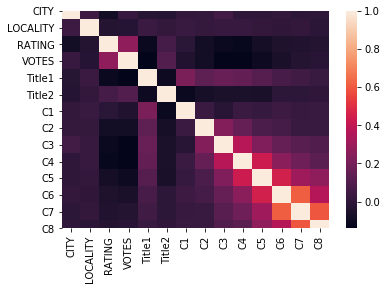

In [84]:
sns.heatmap(data_train.corr())

CITY           AxesSubplot(0.125,0.787927;0.133621x0.0920732)
LOCALITY    AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
RATING       AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
VOTES       AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Title1      AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
Title2         AxesSubplot(0.125,0.677439;0.133621x0.0920732)
C1          AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
C2           AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
C3          AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
C4          AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
C5             AxesSubplot(0.125,0.566951;0.133621x0.0920732)
C6          AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
C7           AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
C8          AxesSubplot(0.606034,0.566951;0.133621x0.0920732)
dtype: object

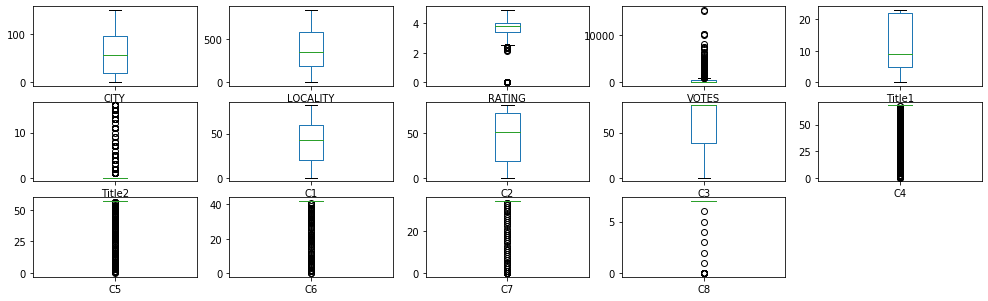

In [85]:
data_train.plot(kind='box',subplots=True,layout=(7,5),figsize=(17,12))

In [86]:
data_train.isnull().sum()

CITY        0
LOCALITY    0
RATING      0
VOTES       0
Title1      0
Title2      0
C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
C7          0
C8          0
dtype: int64

In [87]:
from scipy.stats import zscore
z_score=abs(zscore(data_train))
print(data_train.shape)
data_train_final=data_train.loc[(z_score<3).all(axis=1)]
print(data_train_final.shape)

(4231, 14)
(3778, 14)


In [88]:
data_train=data_train_final

In [89]:
data_test=pd.concat([df_test,new_df_test,df_cuisine_test],axis=1,sort=False)

In [90]:
data_test

,CITY,LOCALITY,RATING,VOTES,COST,Title1,Title2,C1,C2,C3,C4,C5,C6,C7,C8
0,321,286,3.6,49.0,1200,4,0,59,32,66,85,78,69,47,19
1,68,1047,4.2,30.0,1500,4,2,6,60,41,85,78,69,47,19
2,68,1102,3.8,221.0,800,4,0,72,23,12,32,78,69,47,19
3,223,137,4.1,24.0,800,21,0,100,23,93,85,78,69,47,19
4,223,621,3.8,165.0,300,8,0,28,98,93,85,78,69,47,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,132,343,3.8,546.0,500,21,0,72,17,44,85,78,69,47,19
12686,223,134,4.3,1214.0,1800,4,2,37,25,93,85,78,69,47,19
12687,240,1343,4.0,608.0,1300,14,0,34,25,4,18,78,69,47,19
12688,68,632,3.5,32.0,400,4,0,72,84,21,76,78,69,47,19


In [91]:
data_test.isnull().sum()

CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
Title1      0
Title2      0
C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
C7          0
C8          0
dtype: int64

In [93]:
df_x=data_test.drop('COST',axis=1)
y=data_test['COST']
df_x.shape,y.shape

((12690, 14), (12690,))

In [94]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,CITY,LOCALITY,RATING,VOTES,Title1,Title2,C1,C2,C3,C4,C5,C6,C7,C8
0,2.105449,-0.906741,0.147237,-0.403533,-0.919300,-0.272361,0.341539,-0.731418,-0.093562,0.448954,0.257234,0.162169,0.105949,0.074702
1,-0.881778,0.985046,0.655819,-0.426964,-0.919300,0.326852,-1.519342,0.130309,-0.886191,0.448954,0.257234,0.162169,0.105949,0.074702
2,-0.881778,1.121771,0.316765,-0.191427,-0.919300,-0.272361,0.797982,-1.008402,-1.805642,-1.953334,0.257234,0.162169,0.105949,0.074702
3,0.948341,-1.277143,0.571055,-0.434363,1.146991,-0.272361,1.781089,-1.008402,0.762479,0.448954,0.257234,0.162169,0.105949,0.074702
4,0.948341,-0.073957,0.316765,-0.260485,-0.433114,-0.272361,-0.746901,1.299796,0.762479,0.448954,0.257234,0.162169,0.105949,0.074702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,-0.126116,-0.765043,0.316765,0.209355,1.146991,-0.272361,0.797982,-1.193058,-0.791076,0.448954,0.257234,0.162169,0.105949,0.074702
12686,0.948341,-1.284601,0.740582,1.033116,-0.919300,0.326852,-0.430902,-0.946850,0.762479,0.448954,0.257234,0.162169,0.105949,0.074702
12687,1.149064,1.720879,0.486292,0.285812,0.296165,-0.272361,-0.536235,-0.946850,-2.059284,-2.587901,0.257234,0.162169,0.105949,0.074702
12688,-0.881778,-0.046612,0.062474,-0.424497,-0.919300,-0.272361,0.797982,0.868933,-1.520295,0.041019,0.257234,0.162169,0.105949,0.074702


In [95]:
x.shape,y.shape

((12690, 14), (12690,))

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [97]:
lr=LinearRegression()
sv=SVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [98]:
model_list=[]
model_list.append(('LinearRegression',lr))
model_list.append(('SVR',sv))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeRegressor',dt))
model_list.append(('RandomForestRegressor',rf))
model_list.append(('GradientBoostingRegressor',gb))
model_list.append(('AdBoostingRegressor',ad))

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92,test_size=.30)

In [115]:
Model=[]
R2_score=[]
CS=[]
MSE=[]
MAE=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    RS=r2_score(pred,y_test)
    print('r2_score is ',RS)
    R2_score.append(RS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    mse=mean_squared_error(y_test,pred)
    print('mean square error is',mse)
    MSE.append(mse)
    print('\n')
    mae=mean_absolute_error(y_test,pred)
    print('mean absolute error is',mae)
    MAE.append(mae)
    
    

********************** LinearRegression ************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_score is  -4.126647714982729


cross_val is  0.16890637446658363


mean square error is 329013.43516544654


mean absolute error is 330.58219533903326
********************** SVR ************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


r2_score is  -29.357875042460186


cross_val is  0.06137557667510154


mean square error is 381536.1485502132


mean absolute error is 315.41719454185625
********************** Kneighbors ************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2_score is  -0.7613155676747143


cross_val is  0.33478133397062915


mean square 

In [116]:
best_model=pd.DataFrame({'Model': Model,'R2_score':R2_score,'CV_Score':CS,'MSE':mse,'MAE': mae})
best_model

,Model,R2_score,CV_Score,MSE,MAE
0,LinearRegression,-412.664771,16.890637,532056.899877,642.156295
1,SVR,-2935.787504,6.137558,532056.899877,642.156295
2,Kneighbors,-76.131557,33.478133,532056.899877,642.156295
3,DecisionTreeRegressor,46.538261,46.233636,532056.899877,642.156295
4,RandomForestRegressor,64.281945,68.960269,532056.899877,642.156295
5,GradientBoostingRegressor,54.226339,70.363236,532056.899877,642.156295
6,AdBoostingRegressor,-122.789205,-49.604428,532056.899877,642.156295


I am choosing DecissionTree and Random Forest

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
    }

In [119]:
grid_search=GridSearchCV(estimator= rf,param_grid= param_grid,
                        scoring='r2', cv=10, n_jobs=-1)

In [120]:
grid_search=grid_search.fit(x_train,y_train)

In [123]:
score=grid_search.best_score_
score

0.6245705079653543

In [122]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [124]:
#saving the model
from sklearn.externals import joblib

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [125]:
joblib.dump(rf,'rfrestro_joblib')

['rfrestro_joblib']